#4.1 로지스틱 회귀

**럭키백의 확률**

- 생선의 크기, 무게가 주어졌을 때 7개의 생선 중 무엇일지에 대한 확률을 출력해야한다..

=> 아그럼 일단 k최근접 이웃으로 한번 해보자..

In [ ]:
import pandas as pd
fish = pd.read_csv('https://bit.ly/fish_csv_data')
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [ ]:
# 어떤 종류의 생선이 있는지 한번 출력해보자.. pd.unique함수를 쓰면 알 수 있다..

print(pd.unique(fish['Species']))

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


In [ ]:
#데이터프레임에서 원하는 column만 가져와서 인풋데이터를 만든다..
fish_input=fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()

In [ ]:
print(fish_input[:5])           #만들어졌다.. 리스트의 리스트로..

[[242.      25.4     30.      11.52     4.02  ]
 [290.      26.3     31.2     12.48     4.3056]
 [340.      26.5     31.1     12.3778   4.6961]
 [363.      29.      33.5     12.73     4.4555]
 [430.      29.      34.      12.444    5.134 ]]


In [ ]:
fish_target=fish['Species'].to_numpy()        #타겟 데이터 만들기

In [ ]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state=42)     #테스트세트 분리

In [ ]:
#표준화 전처리..
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
ss.fit(train_input)     #훈련세트의 표준화값으로
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)      #테스트세트도 전처리 해주어야한다..

K-최근접 이웃 분류기의 확률 예측..

이웃 갯수를 3개로 지정

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(train_scaled, train_target)      #훈련..
print(kn.score(train_scaled, train_target))     #훈련세트 점수
print(kn.score(test_scaled, test_target))       #테스트세트 점수

# => 둘다 상당히 낮다.. 과소적합인거 같은데 일단 보류..

0.8907563025210085
0.85


**다중 분류** : 타깃 데이터에 2개 이상의 클래스가 포함된 문제

-> 사이킷런에서는 타깃값을 숫자로 안바꾸고 그냥 문자 그대로 사용도 가능.. 근데 알파벳 순서긴 함..

In [ ]:
#타깃값이 저장된 classes_속성..
print(kn.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [ ]:
print(kn.predict(test_scaled[:5]))      #테스트세트 앞에서 5개의 예측값

['Perch' 'Smelt' 'Pike' 'Perch' 'Perch']


In [ ]:
import numpy as np

proba = kn.predict_proba(test_scaled[:5])       #각 클래스별 확률을 반환해주는 메서드
print(np.round(proba, decimals=4))

[[0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.     1.     0.     0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]]


In [ ]:
#가장 가까운 이웃들을 한번 확인해보자..
distances, indexes = kn.kneighbors(test_scaled[3:4])
print(train_target[indexes])

[['Roach' 'Perch' 'Perch']]


-> 근데 이방법은 너무 확률을 제대로 말을 못한다...

**로지스틱 회귀**

로지스틱 회귀는 회귀지만 분류모델이다!!

선형 방정식을 학습한다..

z = a * (Weight) + b * (Length) + c * (Diagonal) + d * (Height) + e * (Width) + f

z는 아무 값이나 가능한데, 이를 시그모이드 함수를 이용해서 0~1사이의 값으로 바꿀 수 있다..

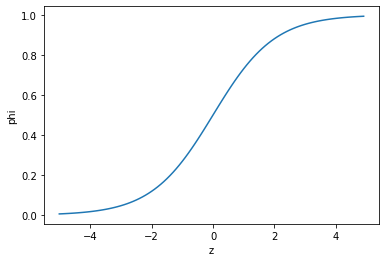

In [ ]:
#시그모이드 함수..
import numpy as np
import matplotlib.pyplot as plt

z = np.arange(-5,5,0.1)
phi = 1/(1+ np.exp(-z))
plt.plot(z,phi)
plt.xlabel('z')
plt.ylabel('phi')
plt.show()

**로지스틱 회귀로 이진 분류 수행하기**

불리언 인덱싱을 해가지고 원하는 종류만 가져와서 일단 이진 분류를 해보자..

In [ ]:
char_arr = np.array(['A','B','C','D','E'])
print(char_arr[[True, False, True, False, False]])
print(train_target)

['A' 'C']
['Bream' 'Pike' 'Smelt' 'Perch' 'Parkki' 'Roach' 'Perch' 'Bream' 'Perch'
 'Perch' 'Perch' 'Bream' 'Perch' 'Parkki' 'Perch' 'Bream' 'Smelt' 'Perch'
 'Roach' 'Bream' 'Pike' 'Bream' 'Pike' 'Perch' 'Parkki' 'Bream' 'Perch'
 'Pike' 'Bream' 'Perch' 'Parkki' 'Roach' 'Perch' 'Bream' 'Roach' 'Perch'
 'Bream' 'Bream' 'Perch' 'Perch' 'Roach' 'Pike' 'Perch' 'Smelt' 'Pike'
 'Roach' 'Perch' 'Parkki' 'Perch' 'Bream' 'Perch' 'Smelt' 'Perch' 'Parkki'
 'Smelt' 'Perch' 'Perch' 'Roach' 'Bream' 'Perch' 'Perch' 'Roach' 'Roach'
 'Perch' 'Perch' 'Bream' 'Roach' 'Bream' 'Roach' 'Parkki' 'Perch' 'Perch'
 'Perch' 'Perch' 'Pike' 'Pike' 'Perch' 'Bream' 'Perch' 'Bream' 'Whitefish'
 'Pike' 'Bream' 'Bream' 'Roach' 'Perch' 'Pike' 'Bream' 'Pike' 'Parkki'
 'Roach' 'Perch' 'Roach' 'Smelt' 'Whitefish' 'Roach' 'Perch' 'Bream'
 'Whitefish' 'Smelt' 'Pike' 'Roach' 'Smelt' 'Bream' 'Roach' 'Pike' 'Perch'
 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Smelt' 'Bream' 'Parkki' 'Perch'
 'Bream' 'Perch' 'Perch']


In [ ]:
# 얘 왜 안대냐?

"""bream_smelt_indexes = (train_target=='Bream')| (train_target == 'Smelt')
target_bream_smelt = train_scaled[bream_smelt_indexes]
#print(bream_smelt_indexes)
print(target_bream_smelt)
print(train_scaled[bream_smelt_indexes])"""
bream_smelt_indexes = (train_target == 'Bream') | (train_target == 'Smelt')
print(bream_smelt_indexes)

[ True False  True False False False False  True False False False  True
 False False False  True  True False False  True False  True False False
 False  True False False  True False False False False  True False False
  True  True False False False False False  True False False False False
 False  True False  True False False  True False False False  True False
 False False False False False  True False  True False False False False
 False False False False False  True False  True False False  True  True
 False False False  True False False False False False  True False False
 False  True False  True False False  True  True False False False False
 False False False False  True  True False False  True False False]


In [ ]:
#데이터에서 도미와 빙어 데이터만을 가져오자..

bream_smelt_indexes = (train_target == 'Bream') | (train_target == 'Smelt')       #빙어와 도미의 것들의 인덱스를 모았다..
train_bream_smelt = train_scaled[bream_smelt_indexes]                             #그 인덱스들만 훈련세트에서 가져왔다
target_bream_smelt = train_target[bream_smelt_indexes]                            #타겟에서도 가져와서 타겟데이터를 만들었다

**로지스틱 회귀로 다중 분류 수행하기**

LogisticRegression클래스는 기본적으로 반복적인 알고리즘 수행..

규제를 alpha가 아닌 C로 규제..

C의 기본값은 1이고, 작을수록 규제가 커진다..

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [ ]:
# 7개의 생선 데이터가 모두 들어있는 train_scaled 와 train_target을 사용한 점을 잘 봐라..

lr = LogisticRegression(C=20, max_iter=1000)
lr.fit(train_scaled, train_target)      # 훈련
print(lr.score(train_scaled, train_target))         #훈련세트점수
print(lr.score(test_scaled, test_target))           #테스트세트 점수

#점수는 나쁘지 않은거 같다..

0.9327731092436975
0.925


In [ ]:
#5개 출력..

print(lr.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Roach' 'Perch']


In [ ]:
#실제 확률값을 한번 보자..

proba = lr.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=3))

#제일 높은게 예측값..

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


In [ ]:
print(lr.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


- 이진 분류는 샘플마다 2개의 확률 측정.. 다중 분류는 샘플마다 각 클래스일 확률을 출력... 여기서는 7개,,

In [ ]:
print(lr.coef_.shape, lr.intercept_.shape)
#모델 파라미터는 5개.. 특성이 5개이기 때문에..

(7, 5) (7,)


In [ ]:
print(lr.coef_)
print(lr.intercept_)
# 각 클래스마다 그 클래스일 확률을 계산해야하므로 z값을 7개를 계산한다.. 

[[-1.49002911 -1.02919221  2.59351113  7.70354318 -1.20068079]
 [ 0.19619256 -2.0106062  -3.77982687  6.50490143 -1.99486463]
 [ 3.56278472  6.34361428 -8.48973364 -5.75756295  3.79309039]
 [-0.10458533  3.60316654  3.93067417 -3.61731229 -1.75070607]
 [-1.40059104 -6.07505264  5.25967743 -0.87222909  1.86043657]
 [-1.38528628  1.49217379  1.3922839  -5.67732641 -4.40095877]
 [ 0.62151448 -2.32410356 -0.90658611  1.71598614  3.69368329]]
[-0.09204845 -0.26290731  3.25101057 -0.14742485  2.65496057 -6.78780765
  1.38421712]


이진 분류가 시그모이드 함수를 이용했던 것과 달리, 다중 분류는 소프트맥스 함수를 사용하여 7개의 z값을 확률로 변환한다..

z값을 0~1로 압축하고 7개를 다 더해서 1이 되도록 한다..

In [ ]:
decision = lr.decision_function(test_scaled[:5])        #7값을 반환한다..
print(np.round(decision, decimals=2))

[[ -6.5    1.03   5.16  -2.73   3.34   0.33  -0.63]
 [-10.86   1.93   4.77  -2.4    2.98   7.84  -4.26]
 [ -4.34  -6.23   3.17   6.49   2.36   2.42  -3.87]
 [ -0.68   0.45   2.65  -1.19   3.26  -5.75   1.26]
 [ -6.4   -1.99   5.82  -0.11   3.5   -0.11  -0.71]]


In [ ]:
#소프트맥스 함수 적용

from scipy.special import softmax
proba = softmax(decision, axis=1)       #decision 리스트를 softmax로 보내는데, axis = 1 : 각 샘플당 합이 1이어야한다.. (행방향..)
print(np.round(proba, decimals=3))

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


**4.1 정리**

- 로지스틱회귀는 이름만 회귀이고 분류 모델이다.
- 선형회귀 처럼 선형방정식을 사용한다.
- 선형방정식을 계산한 값을 0~1로 압축시켜서 사용한다..(시그모이드, 소프트맥스)

1) 이진 분류일 때는 하나의 선형 방정식을 훈련한다.

    -> 이 방정식의 출력값을 시그모이드 함수에 통과시켜 0~1사이의 값을 만든다..
    -> 이 값은 양성 클래스에 대한 확률이다..

2) 다중 분류일 때는 클래스 개수만큼 방정식을 훈련한다.

    -> 각 클래스일 확률을 따로 계산해주어야 하기 때문이다.
    -> 각각의 방정식의 출력값을 소프트맥스 함수에 통과시켜 0~1사이의 값으로 만들고 합이 1이 되도록 한다.
    -> 그럼 그 값이 각 클래스에 대한 확률로 이해할 수 있다..

#4.2 확률적 경사 하강법

**점진적 학습**

데이터가 점진적으로 들어오는 경우에는 점진적인 학습을 시키면 된다..

먼저 훈련한 모델을 버리지 않고 새로운 데이터에 대해서 조금씩 더 훈련하는 방법..

ex)확률적 경사 하강법

**확률적 경사 하강법**

손실함수라는 산을 경사가 가장 가파른 방향으로 따라서 조금씩 내려가는 방법..

- 확률적 : 훈련세트에서 랜덤하게 하나의 샘플을 선택하여 가파른 경사를 조금 내려간다..

훈련세트에서 하나씩 가져와서 다 사용하고 나서도 만족할 만한 위치에 도달하지 못했다면 훈련세트를 다시 다 채우고 다시하는거다!! -> 이게 1에포크

- 에포크 : 확률적 경사하강법에서 훈련 세트를 한 번 모두 사용하는 과정..

한번 경사로를 따라 이동하기 위해서 선택하는 샘플 수에 따라서 미니배치 / 배치 경사하강법이라고 부른다..

**손실함수**

- 어떤 문제에서 머신러닝 알고리즘이 얼마나 엉터리인지를 측정하는 기준.. (샘플하나에 대한 손실을 정의함)

cf) 비용함수 - 훈련세트에 있는 모든 샘플에 대한 손실함수의 합..

- 손실함수의 종류는 여러 개가 있을 수 있다.. (로지스틱 손실함수(이진 크로스엔트로피 손실 함수) : 이진분류일때..)

(다중 분류일 때는 크로스엔트로피 손실함수..)

**로지스틱 손실 함수**

손실 = (예측확률) * (타깃) * (-1)

타깃이 음성클래스(0)이면 손실은 무조건 0이 나오니까 (1 - 예측확률)로 해서 양성 클래스라고 생각한다..

결국..

-> 양성 클래스 : (log(예측확률) ) * (타깃 : 1) * (-1)

-> 음성 클래스 : (log(1-예측확률) )* (타깃 : 1) * (-1)

원래는 손실 값이 음수로 나온다.. (예측확률)에 로그를 취하면 예측확률은 0~1이므로 음수값이 나오고, 마지막에 -1을 곱하므로 최종 손실은 양수가 나온다..

손실이 낮을수록 잘 예측한 것이다..

In [ ]:
import pandas as pd
fish = pd.read_csv('https://bit.ly/fish_csv_data')

In [ ]:
#입력/ 타겟데이터 지정..

fish_input = fish[['Weight', 'Length','Diagonal', 'Height','Width']].to_numpy()
fish_target = fish['Species'].to_numpy()

In [ ]:
#훈련 / 테스트세트 분류

from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state=42)

In [ ]:
#전처리..

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)     #훈련세트로 표준화..
train_scaled = ss.transform(train_input)        #훈련세트 표준화
test_scaled = ss.transform(test_input)          #훈련세트 표준화 값으로 테스트 세트도 표준화..(ss 객체 사용..)

In [ ]:
# 확률적 경사하강 패키지 사용..
from sklearn.linear_model import SGDClassifier

sc = SGDClassifier(loss='log', max_iter=10, random_state=42)        #손실함수는 로지스틱 함수.. 10회 에포크 반복,,
sc.fit(train_scalain_scaled, train_targeed, train_target)
print(sc.score(trt))
print(sc.score(test_scaled, test_target))

#점수가 너무 낮다.. 에포크가 부족한거 같다..

0.773109243697479
0.775


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


partial_fit() 메서드..

- 모델을 이어서 훈련할때 사용한다..
- 1에포크씩 이어서 훈련한다..

In [ ]:
sc.partial_fit(train_scaled, train_target)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=10,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=42, shuffle=True, tol=0.001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [ ]:
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

#조금 올랏다.. -> 그럼 몇번을 더 해야하는가..??

0.8151260504201681
0.825


적절하게 에포크 수를 조절해서 과대/과소 적합을 피해야 한다..

- 에포크를 너무 많이하면 훈련세트에 과대적합..
- 에포크를 너무 적게하면 훈련이 덜 된다.

조기종료 : 과대적합이 시작되기 전에 tol변수를 주어서 자동으로 에포크를 멈춘다..

In [ ]:
# 훈련/테스트 세트 점수를 그래프로 그려보자

import numpy as np
sc = SGDClassifier(loss = 'log', random_state=42)
train_score =[]
test_score =[]

#partial_fit()메서드만을 이용해서 훈련을 하려면 전체 클래스의 레이블을 전달해 주어야한다..
classes = np.unique(train_target)

In [ ]:
for _ in range(0,300):
    sc.partial_fit(train_scaled, train_target, classes=classes) #레이블값 전달..
    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target))

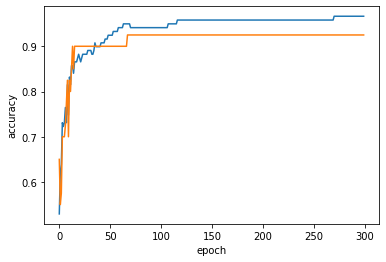

In [ ]:
#300번의 에포크가 돌아갔고, 그래프를 그려보자..
#여기서 plot함수 쓸 때 바로 이게 되는건가? 원래 x y 축에 뭐들어가는지 보고 해야하는거 아닌가..
#없으면 자동으로 0부터 y의 갯수만큼 생긴다.. 그래서 train_score가 길이가 300이므로 0~299까지 생김..

import matplotlib.pyplot as plt
plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

#100에포크 이후로 점점 과대적합됨..

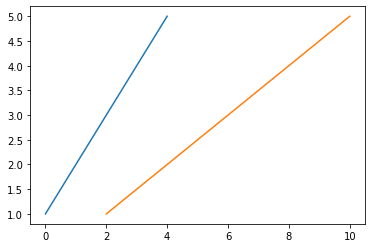

In [ ]:
plt.plot([1,2,3,4,5])
plt.plot([2,4,6,8,10],[1,2,3,4,5])
plt.show()

In [ ]:
# 에포크를 100으로 고정하자..

sc = SGDClassifier(loss = 'log', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.957983193277311
0.925


손실함수의 종류에는 여러가지가 있다.. ex)힌지손실, 서포트 벡터 머신..

-> loss 매개변수에 지정해 줄 수 있다..

In [ ]:
#힌지 손실로 해보자..

sc = SGDClassifier(loss='hinge',max_iter=100,tol=None,random_state=42)
sc.fit(train_scaled,train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.9495798319327731
0.925


**정리**

1)확률적 경사 하강법

 : 훈련 세트에서 샘플 하나씩 꺼내 손실 함수의 경사를 따라 최적의 모델을 찾는 알고리즘 (여러개면 미니배치, 전체 다 면 배치)

2)손실 함수

 : 